1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [28]:
import numpy as np
import matplotlib.pyplot as plt 
N =1000 # num of data points
mu1, sigma1 = 0, 1 # mean and standard deviation
mu2, sigma2 = 0, 3
x1 = np.random.normal(mu1, sigma1, N)
x2 = x1 + np.random.normal(mu2, sigma2, N)
x3 = 2*x1+x2

X = np.stack((x1, x2, x3), axis=0)

cov_X= np.cov(X)
l, V = np.linalg.eig(cov_X) # is this n size order 

#svd can apply to any shape not just sq
U, spec, v_trans = np.linalg.svd(X) # eigen vectors, 

l_svd = spec**2/(N-1)
V_svd = U

print('*********')
print(l)
print(l_svd)

Xp = np.dot(V, X)
Lambda=np.diag(l)
print('Lambda')
print(Lambda) 

print ("A.trace():", np.cov(X).trace())
print ("Lambda.trace():", Lambda.trace())

print('Percentage of  the total variability')
print ((Lambda[0,0]+Lambda[2,2])/(Lambda[0,0]+Lambda[1,1]+Lambda[2,2]))

*********
[2.56592006e+01 1.15813636e-15 2.18077406e+00]
[2.56876236e+01 2.18771141e+00 6.83468746e-32]
Lambda
[[2.56592006e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.15813636e-15 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.18077406e+00]]
A.trace(): 27.83997469640709
Lambda.trace(): 27.83997469640709
Percentage of  the total variability
1.0


This makes sense as one of our dimensions in a linear combination of the other dimensions 

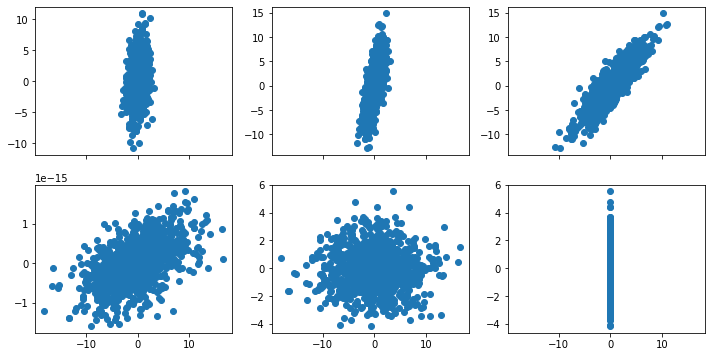

In [32]:
#ndarray.TThe transposed array.
Xp = np.dot(V.T, X)

fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2, ncols=3, sharex=True,
                                    figsize=(12, 6))


ax0.scatter(x1,x2)
ax1.scatter(x1,x3)
ax2.scatter(x2,x3)

ax3.scatter(Xp[0],Xp[1])
ax4.scatter(Xp[0],Xp[2])
ax5.scatter(Xp[1],Xp[2])

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [48]:
#gen uncorrelated varibles
v_l = [] # variables list
mu1, sigma1 = 0, 1

for v in range(0, 10):
    v_l.append(np.random.normal(mu1+v, (sigma1+v)/50, N))
    
X_n = np.stack((x1, x2, x3, v_l[0], v_l[1], v_l[2], v_l[3], v_l[4], 
                    v_l[5],v_l[6], v_l[7],v_l[8], v_l[9]), axis=0)




U_n, spec_n, v_trans_n = np.linalg.svd(X_n) # eigen vectors, 

Lambda_n = spec_n**2/(N-1)
V_n = U_n

Xp_n = np.dot(V_n, X_n)

print('Lambda with noise')
print(Lambda_n) 

print('Percentage of  the total variability')
print ((Lambda_n[0]+Lambda_n[1])/(np.sum(Lambda_n)))

Lambda with noise
[2.85431741e+02 2.56561548e+01 2.18078106e+00 3.78268950e-02
 2.70471906e-02 2.01290628e-02 1.52004294e-02 1.06544318e-02
 6.37131467e-03 3.94288356e-03 1.56945853e-03 3.99872828e-04
 7.93678053e-32]
Percentage of  the total variability
0.9926484277175375


The noise was largely removed by PCA however it did reduce total variblity very slightly.  

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 